In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


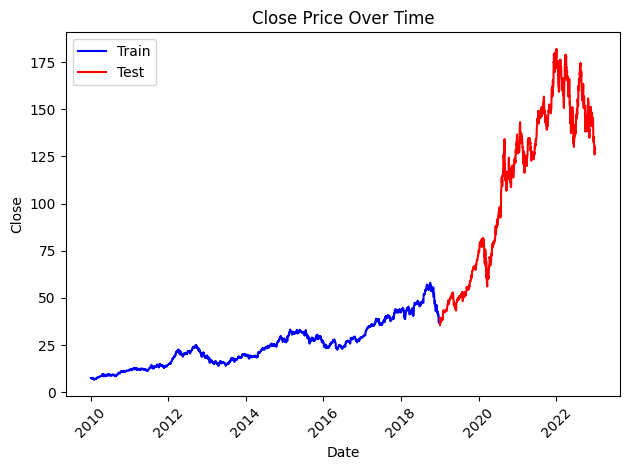

In [2]:
#data preprocessing
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
data = Data('AAPL',start_date,end_date,2019)
data.data_preprocess()

In [24]:
ga = IslandGGA(data=data.train_data,num_islands=3,m_iter= 10,num_iter=100,n_migrants_rate=0.8,pSize=200,r_cross=0.3,r_mut=0.1,strategies=data.strategies,evolve_strategy="multikuti")
ga.evolve()

Running multikuti
GENERATION 0 START
Generation 0: Best fitness = 394.05783571410063 Average Fitness = 194.29011510547025
GENERATION 0 END
GENERATION 1 START
Generation 1: Best fitness = 396.32536302788174 Average Fitness = 227.89965720722444
GENERATION 1 END
GENERATION 2 START
Generation 2: Best fitness = 423.036983166472 Average Fitness = 248.8480704129154
GENERATION 2 END
GENERATION 3 START
Generation 3: Best fitness = 583.0231178998592 Average Fitness = 267.78977202316145
GENERATION 3 END
GENERATION 4 START
Generation 4: Best fitness = 586.4290284170651 Average Fitness = 278.8175117037622
GENERATION 4 END
GENERATION 5 START
Generation 5: Best fitness = 653.9228670832669 Average Fitness = 312.6479583777028
GENERATION 5 END
GENERATION 6 START
Generation 6: Best fitness = 655.2859987024583 Average Fitness = 342.60142363722144
GENERATION 6 END
GENERATION 7 START
Generation 7: Best fitness = 655.2859987024583 Average Fitness = 373.39109642748866
GENERATION 7 END
GENERATION 8 START
Gener

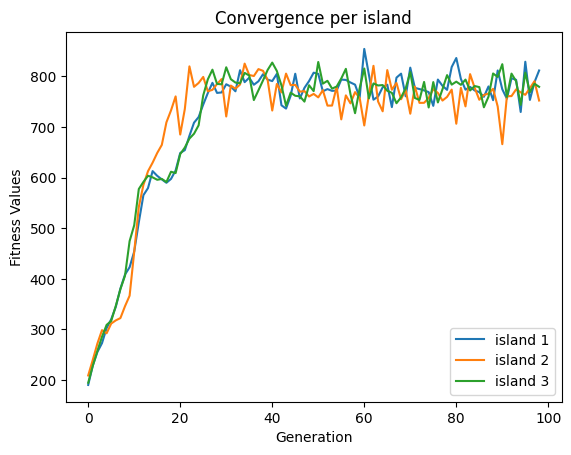

In [23]:
#plot
x = range(len(ga.island_convergence[:-1]))
y = [[island[i] for island in ga.island_convergence[:-1]] for i in range(len(ga.island_convergence[0][:-1]))]
# Define the labels for each data column
labels = [f'island {i+1}' for i in range(len(y))]

# Plot the data dynamically using a loop
for i, column in enumerate(y):
    plt.plot(x, column, label=labels[i])
plt.xlabel('Generation')
plt.ylabel('Fitness Values')
plt.title('Convergence per island')
plt.legend()
plt.show()

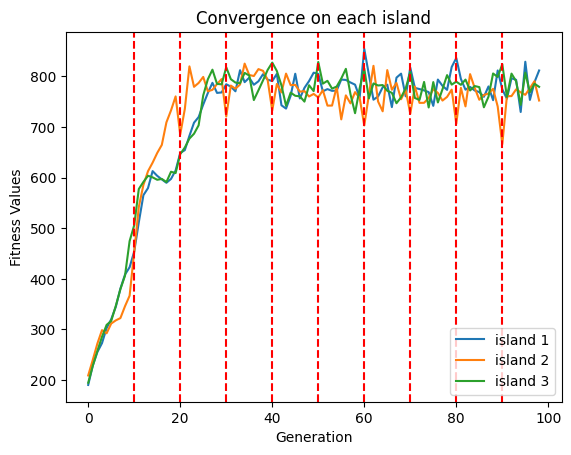

In [22]:
#plot
x = range(len(ga.island_convergence[:-1]))
y = [[island[i] for island in ga.island_convergence[:-1]] for i in range(len(ga.island_convergence[0][:-1]))]
# Define the labels for each data column
labels = [f'island {i+1}' for i in range(len(y))]

# Plot the data dynamically using a loop
for i, column in enumerate(y):
    plt.plot(x, column, label=labels[i])

# Add vertical lines after every 5th value on the x-axis
for i in range(ga.m_iter, len(x), ga.m_iter):
    plt.axvline(i, color='red', linestyle='--')

plt.xlabel('Generation')
plt.ylabel('Fitness Values')
plt.title('Convergence on each island')
plt.legend()
plt.show()
